# Calculating band indices <img align="right" src="../Supplementary_data/dea_logo.jpg">

* [**Sign up to the DEA Sandbox**](https://docs.dea.ga.gov.au/setup/sandbox.html) to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with both the `DEA Sandbox` and `NCI` environments
* **Products used:** 
[ga_ls8c_ard_3](https://explorer.sandbox.dea.ga.gov.au/ga_ls8c_ard_3)

## Background
Remote sensing indices are combinations of spectral bands used to highlight features in the data and the underlying landscape.
Using Digital Earth Australia's archive of analysis-ready satellite data, we can easily calculate a wide range of remote sensing indices that can be used to assist in mapping and monitoring features like vegetation and water consistently through time, or as inputs to machine learning or classification algorithms.


## Description
This notebook demonstrates how to:
 
* Calculate an index manually using `xarray`
* Calculate one or multiple indices using the function `calculate_indices` from `dea_tools.bandindices`
* Calculate indices while dropping original bands from a dataset
* Calculate an index in-place without duplicating original data to save memory on large datasets
 
***

## Getting started
To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages

In [1]:
%matplotlib inline

import datacube
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import xarray as xr

import sys
sys.path.insert(1, '../Tools/')
from dea_tools.datahandling import load_ard
from dea_tools.bandindices import calculate_indices
from dea_tools.plotting import rgb


### Connect to the datacube

In [2]:
dc = datacube.Datacube(app='Calculating_band_indices')

## Create a query and load satellite data
To demonstrate how to compute a remote sensing index, we first need to load in a time series of satellite data for an area. 
We will use data from the Landsat 8 satellite:

In [3]:
ymax, xmin = -28.11225, 153.473
ymin, xmax = -28.1268, 153.4822

# Create a reusable query
query = {
    'x': (xmin, xmax),   
    'y': (ymax, ymin),
    'time': ('2022-06-23', '2022-06-25'),
    'measurements': [
        'nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1',
        'nbart_swir_2'
    ],
    'resampling': 'bilinear',
    'output_crs': 'EPSG:3577',
    'resolution': (-60, 60),
    'group_by': 'solar_day'
}

# Load available data from Landsat 8 and filter to retain only times
# with at least 99% good data
ds = load_ard(dc=dc, products=['ga_ls8c_ard_3'], min_gooddata=0.0, **query, mask_pixel_quality=False)


Finding datasets
    ga_ls8c_ard_3
Loading 1 time steps


### Plot the first image to see what our area looks like
We can use the `rgb` function to plot the first timestep in our dataset as a true colour RGB image:

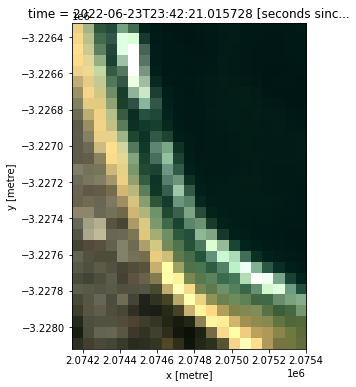

In [4]:
# Plot as an RGB image
rgb(ds, index=0)


## Calculate an index for this area manually
One of the most commonly used remote sensing indices is the Normalised Difference Vegetation Index or `NDVI`. 
This index uses the ratio of the red and near-infrared (NIR) bands to identify live green vegetation.
The formula for NDVI is:

$$
\begin{aligned}
\text{NDVI} & = \frac{(\text{NIR} - \text{Red})}{(\text{NIR} + \text{Red})} \\
\end{aligned}
$$

When interpreting this index, high values indicate vegetation, and low values indicate soil or water.

### Using `calculate_indices`, we get the same result:

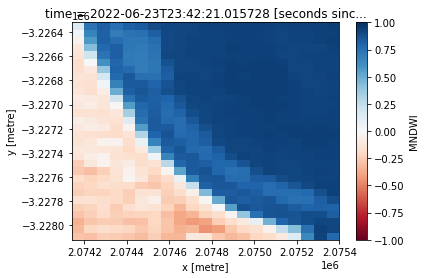

In [5]:
# Calculate NDVI using `calculate indices`
ds_ndvi = calculate_indices(ds, index='MNDWI', collection='ga_ls_3')

# Plot the results 
ds_ndvi.MNDWI.isel(time=0).plot(vmin=-1, vmax=1, cmap='RdBu')


In [6]:
mndwi = ds_ndvi.MNDWI

In [ ]:
pip install matplotlib==3.5.3

In [7]:
import matplotlib
matplotlib.__version__

'3.5.3'

In [8]:
from dea_tools.spatial import xr_vectorize

poly_gdf = xr_vectorize(mndwi < 0.3, crs=mndwi.geobox.crs)
poly_gdf['geometry'] = poly_gdf.geometry.boundary


<AxesSubplot:>

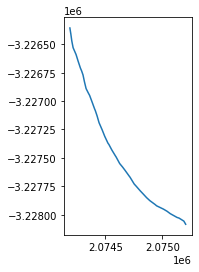

In [9]:
from dea_tools.spatial import subpixel_contours
line_gdf = subpixel_contours(mndwi, 0.3, crs=mndwi.geobox.crs, min_vertices=20)
line_gdf.plot()

1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100


frame=  100 fps= 27 q=-1.0 Lsize=     653kB time=00:00:04.04 bitrate=1323.1kbits/s speed=1.09x    


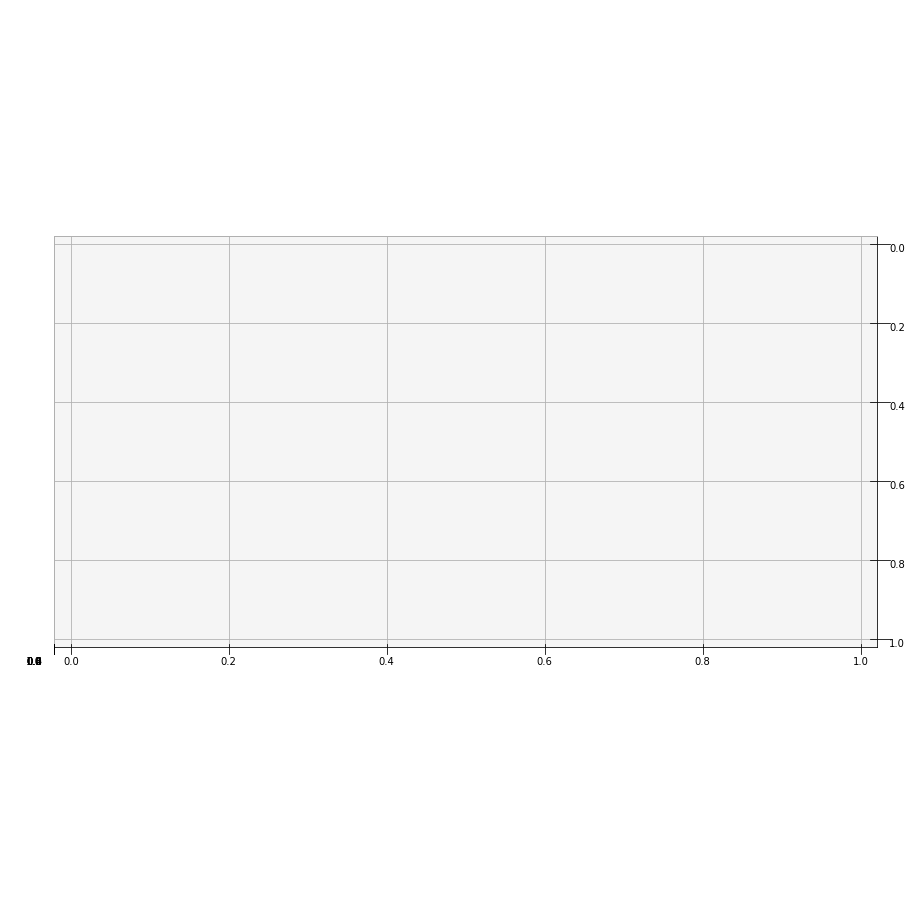

In [18]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d", "computed_zorder": False}, figsize=(16, 9))
fig.subplots_adjust(
    top=1.55, 
    bottom=-.45,
)

# ax.set_facecolor('grey')
# fig.patch.set_facecolor('xkcd:mint green')


# # Whole pizel
# n = 2
# elevs = np.linspace(90, 90, n)
# azimuths = np.linspace(360, 360, n)
# zfactors = np.linspace(0, 0, n)
# show_line = 'pixel'
# out_name = 'pixel.mp4'

# # Forward
# n = 100
# elevs = np.linspace(90, 45, n)
# azimuths = np.linspace(360, 330, n)
# zfactors = np.linspace(0, 0.5, n)
# show_line = False
# out_name = '2d_to_3d.mp4'

# Backward
n = 100
elevs = np.linspace(45, 90, n)
azimuths = np.linspace(330, 360, n)
zfactors = np.linspace(0.5, 0, n)
show_line = 'subpixel'
out_name = '3d_to_2d.mp4'


X, Y = np.meshgrid(mndwi.x, mndwi.y)
Z = mndwi.squeeze("time").values * -1.0

if show_line=='subpixel':
    X_line, Y_line = line_gdf.iloc[0].explode().geometry.coords.xy
    Z_line = [-0.3] * len(X_line)

if show_line == 'pixel':
    X_line, Y_line = np.array(poly_gdf.iloc[[0]].clip(poly_gdf.iloc[[1]].buffer(1)).iloc[0].explode().geometry.coords[0:-2]).T
    Z_line = [-0.3] * len(X_line) 
    X_line = np.array(X_line) - 30
    Y_line = np.array(Y_line) + 30


for i, (elev, azimuth, zfactor) in enumerate(zip(elevs, azimuths, zfactors)):
    print(f"{i + 1} / {n}")

    # # Plot the surface.
    surf = ax.plot_surface(
        X,
        Y,
        Z,
        cmap="RdBu_r",
        linewidth=0,
        antialiased=True,
        shade=True,
        edgecolor="black",
        animated=True,
        vmin=-1.2,
        vmax=0.8,
        zorder=0,
    )

    ax.set_box_aspect((1, 2, zfactor))
    ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, color="black", linewidth=0.4, zorder=1)
    
    if show_line:
        ax.plot(X_line, Y_line, Z_line, '-', zorder=2, linewidth=4, color="black")
        
#     ax.view_init(45, 340)
#   ax.view_init(90, 360)
    ax.view_init(elev, azimuth)
    ax.grid(None)
    ax.set_axis_off()
    
    
    fig.savefig(f"test_{i}.png")   
    if n > 2:
        ax.clear()
        
import os
os.system(f'ffmpeg -y -r 24 -start_number 0 -i test_%d.png -frames:v {n+1} -c:v libx264 -vf "fps=24,format=yuv420p,pad=ceil(iw/2)*2:ceil(ih/2)*2" -threads 7 {out_name} -loglevel quiet -stats')

from IPython.display import Video
Video(out_name)

In [16]:
elevs

array([90.        , 89.54545455, 89.09090909, 88.63636364, 88.18181818,
       87.72727273, 87.27272727, 86.81818182, 86.36363636, 85.90909091,
       85.45454545, 85.        , 84.54545455, 84.09090909, 83.63636364,
       83.18181818, 82.72727273, 82.27272727, 81.81818182, 81.36363636,
       80.90909091, 80.45454545, 80.        , 79.54545455, 79.09090909,
       78.63636364, 78.18181818, 77.72727273, 77.27272727, 76.81818182,
       76.36363636, 75.90909091, 75.45454545, 75.        , 74.54545455,
       74.09090909, 73.63636364, 73.18181818, 72.72727273, 72.27272727,
       71.81818182, 71.36363636, 70.90909091, 70.45454545, 70.        ,
       69.54545455, 69.09090909, 68.63636364, 68.18181818, 67.72727273,
       67.27272727, 66.81818182, 66.36363636, 65.90909091, 65.45454545,
       65.        , 64.54545455, 64.09090909, 63.63636364, 63.18181818,
       62.72727273, 62.27272727, 61.81818182, 61.36363636, 60.90909091,
       60.45454545, 60.        , 59.54545455, 59.09090909, 58.63

In [ ]:
"""
Example showing shaded 3d plots. It is based on the [shading example](
http://matplotlib.org/examples/pylab_examples/shading_example.html).
The surface used is the Matlab `peaks()`.
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

fig = plt.figure()
ax = fig.gca(projection='3d')

# Test data: Matlab `peaks()`
x, y = np.mgrid[-3:3:150j,-3:3:150j]
z =  3*(1 - x)**2 * np.exp(-x**2 - (y + 1)**2) \
   - 10*(x/5 - x**3 - y**5)*np.exp(-x**2 - y**2) \
   - 1./3*np.exp(-(x + 1)**2 - y**2) 

# create light source object.
ls = LightSource(azdeg=0, altdeg=65)
# shade data, creating an rgb array.
rgb = ls.shade(z, plt.cm.RdBu)
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0,
                       antialiased=False, facecolors=rgb)


plt.show()

In [ ]:
from datacube.utils.geometry import assign_crs
from datacube.utils.cog import write_cog

# Export as a GeoTIFF
write_cog(geo_im=assign_crs(ds_ndvi.MNDWI),
          fname='mndwi.tif',
          overwrite=True)



> **Note**: when using the `calculate_indices` function, it is important to set the `collection` parameter correctly. 
This is because different satellite collections use different names for the same bands, which can lead to invalid results if not accounted for. 
For Landsat (i.e. GA Landsat Collection 3), specify `collection='ga_ls_3'`. 
For Sentinel 2 (i.e. GA Sentinel 2 Collection 1), specify `collection='ga_s2_1'`.

### Using calculate_indices to calculate multiple indices at once
The `calculate_indices` function makes it straightforward to calculate multiple remote sensing indices in one line of code.

In the example below, we will calculate `NDVI` as well as two common water indices: the Normalised Difference Water Index (`NDWI`), and the Modified Normalised Difference Index (`MNDWI`).
The new indices will appear in the list of `data_variables` below:

In [ ]:
# Calculate multiple indices
ds_multi = calculate_indices(ds, index=['NDVI', 'NDWI', 'MNDWI'], collection='ga_ls_3')
ds_multi


### Dropping original bands from a dataset
We can also drop the original satellite bands from the dataset using `drop=True`. 
The dataset produced below should now only include the new `'NDVI', 'NDWI', 'MNDWI'` bands under `data_variables`:

In [ ]:
# Calculate multiple indices and drop original bands
ds_drop = calculate_indices(ds, 
                            index=['NDVI', 'NDWI', 'MNDWI'], 
                            drop=True, 
                            collection='ga_ls_3')
ds_drop


### Calculating indices in-place to reduce memory usage for large datasets
By default, the `calculate_indices` function will create a new copy of the original data that contains the newly generated remote sensing indices.
This can be problematic for large datasets, as this effectively doubles the amount of data that is stored in memory.

To calculate remote sensing indices directly in-place within the original dataset without copying the data, we can run the function with the parameter `inplace=True`. 
Note that we don't need to assign any output for the function, as the changes will be made to the original data.

In [ ]:
# Calculate index in place without copying data
calculate_indices(ds, 
                  index=['TCW'], 
                  collection='ga_ls_3', 
                  inplace=True)
ds

---

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** May 2022

**Compatible datacube version:**

In [ ]:
print(datacube.__version__)

## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)